# <span style="color:rgb(160,0,86)">Testverfahren mit Resampling</span>

***

## <span style="color:rgb(160,0,86)">Lernziele</span>

- Sie verstehen die Idee des **statistischen Testens**.
- Sie kennen den Unterschied zwischen der **Nullhypothese** und der **Alternativhypothese**.  
- Sie können mit dem **Permutationstest** und **Bootstrap-Test** Hypothesen testen.
- Sie können **p-Werte** bestimmen und kennen ihre Bedeutung.

***

### <span style="color:rgb(160,0,86)">Was ist ein statistischer Hypothesen-Test?</span>

Die **Versuchsplanung** ist ein Eckpfeiler der statistischen Praxis. In praktisch allen angewandten Forschungsbereichen werden Experiment entworfen,  <center><span style="color:rgb(160,0,86)"> **um eine Hypothese zu bestätigen oder zu verwerfen**.</span></center> 

<span style="color:rgb(160,0,86)"> ***Merksatz:***</span> Eine **Hypothese** ist eine **behauptete Annahme** über einen Zusammenhang in der Welt, die man **durch Daten überprüfen** kann.

Datenwissenschaftler führen etwa kontrollierte Experimente durch (z.B. A/B-Tests, Stichproben-Tests, multivariate Tests), um zu verstehen, wie **Änderungen an** 
- **Benutzerschnittstellen** (User Interface = UI) <br>*"Wenn der Kaufen-Button grösser ist, klicken mehr Nutzer darauf."*
- **Marketingstrategien** <br>*"Personalisierte E-Mail (statt Standardmail) erhöht die Öffnungsrate"*
- **Funktionsdesign** <br>*"Bestellvorgang mit nur 3 statt 5 Schritten führt zu weinger Abbrüchen."*
- **Prozessen** <br> *"Entspricht die durchschnittliche Ladezeit einer Website nach einem Systemupdate noch dem bisherigen Sollwert von zwei Sekunden."*
 
die **Zufriedenheit** der Nutzer oder das **Verhalten** eines Systems  **beeinflussen**.

Die klassische **Pipeline statistischer Schlussfolgerungen** ist zusammengefasst: 

$$\left.\begin{array}{l}
\text{Hypothese}\\
\text{aufstellen}\end{array}\right\}\Longrightarrow\;\;
\left.\begin{array}{l}
\text{expreimentelles}\\
\text{Design wählen}\end{array}\right\}\Longrightarrow\;\;
\left.\begin{array}{l}
\text{Daten}\\
\text{sammeln}\end{array}\right\}\Longrightarrow\;\;
\begin{array}{l}
\text{Schlussfolgerung}\\
\text{machen}\end{array}$$
 
- Dieser Prozess beginnt mit einer **Hypothese** (*"Medikament A ist besser als das bestehende Standardmedikament"*, *"Preis A ist profitabler als der bestehende Preis B"*).
- Ein **Experiment** (z.B. ein *A/B-Test*) wird entworfen, um die Hypothese zu testen - und zwar so, dass es hoffentlich schlüssige Ergebnisse liefert.
- Die **Daten** werden gesammelt und analysiert,
- und dann wird eine **Schlussfolgerung** gezogen.

<span style="color:rgb(160,0,86)"> ***Bemerkung:***</span> Mit Schlussfolgerung ist gemeint, dass man Erkenntnisse aus einer **kleinen Stichprobe** auf eine **grössere Gruppe** oder einen **allgemeinen Prozess** überträgt.


### <span style="color:rgb(160,0,86)">Warum machen wir einen Hypothesen-Test?</span>

Wir möchten herausfinden, ob **der Zufall** für einen beobachteten Effekt **verantwortlich** sein könnte.

Im Hinterkopf steht oft eine **Hypothese**, etwa: *"Der Preis B bringt einen höheren Gewinn".* 

<span style="color:rgb(160,0,86)"> ***Frage:***</span> Warum brauchen wir eine Hypothese? Warum schaut man sich nicht einfach das Ergebnis des Experiments an und entscheidet sich für die Situation, die besser abschneidet?

Weil unser Verstand dazu neigt, die **Tragweite des Zufallsverhaltens** zu unterschätzen. Dies äussert sich unter anderem darin, dass
- extreme Ereignisse nicht vorhergesehen werden. 
- zufällige Eignisse **fälschlicherweise als Muster** mit einer gewissen Bedeutung interpretiert werden. 

<span style="color:rgb(160,0,86)">***Das systematische Vorgehen bei der Hypothesenprüfung wurde erfunden, um die Forscher davor zu schützen, vom Zufall getäuscht zu werden.***</span>

Die menschliche Tendenz, den Zufall zu unterschätzen, kann man in einem Experiment beobachten: 

*Bitte mehrere Freunde, sich eine Folge von 50 Münzwürfen auszudenken und aufzuschreiben. Danach sollen sie wirklich 50 Mal eine Münze werfen und auch diese Ergebnisse notieren.
Wenn die echten und die ausgedachten Ergebnisse getrennt auf zwei Stapel gelegt werden, wirst du schnell erkennen, in welchem Stapel die echten sind:*
- In den echten Ergebnissen kommen längere Reihen von **Kopf**
oder **Zahl** vor.

Bei 50 echten Münzwürfen ist es nicht ungewöhnlich, fünf- oder sechsmal die gleiche Seite der Münze zu sehen. Wenn wir jedoch zufällige Münzwürfe erfinden, wechseln wir nach vier oder fünf gleichen Seiten, damit die Serie zufällig aussieht.

***Dadurch neigen wir dazu, eine Serie von sechs gleichen Münzwürfen beim echten Werfen nicht als Zufall zu sehen, sondern als etwas Bedeutungsvolles.***



### <span style="color:rgb(160,0,86)">Auf welcher Logik beruht ein Hypothesen-Test?</span>

Weil wir die Tendenz haben, ein ungewöhnliches, aber zufälliges Verhalten als etwas Bedeutungsvolles zu interpretieren, verlangen wir in unseren Experimenten den **Nachweis**, dass **ein Unterschied extremer ist als das**, was **der Zufall** vernünftigerweise hervorbringen könnte.

<span style="color:rgb(160,0,86)"> ***Merksatz:*** </span> Die **Grundannahme** ist, dass ein Unterschied **nur auf den Zufall** zurückzuführen ist - diese Annahme wird als **Nullhypothese** bezeichnet. 

- <span style="color:rgb(160,0,86)">***Wir hoffen nun, dass wir diese Nullhypothese widerlegen können und mit dem Experiment zeigen können, dass ein Unterschied grösser ist, als es der Zufall zulässt.***</span>

Ein Hypothesen-Test beinhalten naturgemäss nicht nur eine Nullhypothese, sondern auch eine **entgegengesetzte Alternativhypothese**. Wir unterscheiden zwischen **einseitigen** und **zweiseitigen** Tests – je nachdem, welche Art von Alternativhypothese wir prüfen möchten:

- <span style="color:rgb(160,0,86)">**Einseitiger Test:**</span> <br> Wenn wir eine ***gerichtete Alternativhypothese*** formulieren, also vermuten, dass ein Effekt in eine bestimmte Richtung auftritt (z.B. dass Methode B bessere Ergebnisse liefert als Methode A), dann verwenden wir einen einseitigen Hypothesen-Test. <br> ***In diesem Fall berücksichtigen wir nur extreme Zufallsergebnisse in dieser einen Richtung.***

- <span style="color:rgb(160,0,86)">**Zweiseitiger Test:**</span> <br> Wenn wir eine ***ungerichtete Alternativhypothese*** prüfen, also lediglich annehmen, dass sich zwei Ergebnisse irgendwie unterscheiden (z.B. dass Methode A und Methode B unterschiedliche Ergebnisse liefern, ohne eine Richtung vorzugeben), dann verwenden wir einen zweiseitigen Hypothesen-Test. <br> ***In diesem Fall werden extreme Zufallsergebnisse in beiden Richtungen berücksichtigt*** – also sowohl deutlich höhere als auch deutlich niedrigere Werte.

<span style="color:rgb(160,0,86)">***Merksatz:***</span> Zusammen müssen die **Null- und die Alternativhypothese alle Möglichkeiten** abdecken. 


Die Art der Nullhypothese bestimmt die Struktur des Hypothesen-Tests. Zum Beispiel:
1) ***Nullhypothese:*** <br> *"Es gibt keinen Unterschied zwischen den Mittelwerten von A und B."*</br>
***Ungerichtete Alternativhypothese:*** <br> *"Der Mittelwert von A unterscheidet sich vom Mittelwert von B (kann grösser oder kleiner sein)."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Zweiseitiger Hypothesen-Test**</span>
3) ***Nullhypothese:*** <br> *"Der Mittelwert von A ist kleiner oder gleich als der Mittelwert von B."*</br>
***Gerichtete Alternativhypothese:*** <br> *"Der Mittelwert von B ist grösser als der Mittelwert von A."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Einseitiger Hypothesen-Test**</span>
4) ***Nullhypothese:*** <br> *"Der Mittelwert von B ist um $5\%$ grösser als der Mittelwert von A."*</br>
***Gerichtete Alternativhypothese:*** <br> *"Der Mittelwert von B ist nicht um $5\%$ grösser als der Mittelwert von A."* <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **Einseitiger Hypothesen-Test**</span>

### <span style="color:rgb(160,0,86)">Wie können wir mit einer Stichprobe den Test entscheiden?</span>

**Resampling-Verfahren** bilden eine allgemeine Klasse statistischer Methoden, die auf ***wiederholtem Ziehen*** oder ***Neuordnen*** der **vorhandenen Daten** beruhen.
- <span style="color:rgb(160,0,86)"> ***Ziel ist es, die Bedeutung eines beobachteten Unterschieds oder Abweichung ohne Annahmen über die zugrunde liegende Verteilung der Grundgesamtheit zu beurteilen.***</span>

Wir unterscheiden zwischen **Permutationstest** und **Bootstrap-Test**:

##### <span style="color:rgb(160,0,86)"><strong>1) Permutationstest – Vergleich von zwei Gruppen</strong></span>

Der **Permutationstest** prüft, ob zwischen zwei (oder mehr) Gruppen ein systematischer Unterschied besteht.
Wenn die Nullhypothese gilt (es gibt keinen echten Unterschied), dann ist es Zufall, welche Beobachtung zu welcher Gruppe gehört.

Daher können wir die ***Gruppenzugehörigkeiten zufällig vertauschen*** (permutieren) und beobachten, wie stark sich die Gruppenunterschiede rein zufällig verändern.

<span style="color:rgb(160,0,86)"> ***Pseudocode:*** </span>

<span style="font-family: monospace"><strong>Eingabe:</strong> Daten aus zwei Gruppen A und B <br>
<strong>Schritt 1:</strong> Berechne den beobachteten Unterschied $\Delta_{\text{beobachtet}}$ <br> <strong>Schritt 2:</strong> Wiederhole viele Male: <br>
$\quad\quad$ <strong>a)</strong> Lege die Werte aus A und B zusammen.<br>
$\quad\quad$ <strong>b)</strong> Teile sie zufällig in zwei Gruppen gleicher Grösse wie A und B<br>
$\quad\quad$ <strong>c)</strong> Berechne erneut den Unterschied $\Delta_{\text{resample}}$ und speichere ihn<br>
<strong>Schritt 3:</strong> Bestimme die relative Häufigkeit, wie oft der Unterschied $\Delta_{\text{resample}}$ gemäss der Nullhypothese mindestens so extrem ist wie $\Delta_{\text{beobachtet}}$. <br> <strong>Ausgabe:</strong> Der p-Wert, also die bei Schritt 3 berechnete relative Häufigkeit. <br></span>


##### <span style="color:rgb(160,0,86)"><strong>2) Bootstrap-Test – Prüfung einer Stichprobe gegen einen Sollwert</strong></span>

Wenn wir nur eine Stichprobe haben und prüfen möchten, ob sie **mit einem Sollwert** (z.B. mittlere Ladezeit) übereinstimmt, können wir keinen Permutationstest verwenden – es gibt ja keine zweite Gruppe, deren Werte vertauscht werden könnten.

Stattdessen nutzen wir den **Bootstrap-Ansatz** und ziehen wiederholt ***Zufallsstichproben mit Zurücklegen*** aus den vorhandenen Daten und vergleichen unter der Annahme der Nullhypothe dieses Resample mit dem Sollwert.

<span style="color:rgb(160,0,86)"> ***Pseudocode:*** </span>

<span style="font-family: monospace"><strong>Eingabe:</strong> Stichprobe $x_1, x_2, ... , x_n$ und Sollwert $\theta_0$ <br>
<strong>Schritt 1:</strong> Berechne den beobachteten Wert $\theta_{\text{beobachtet}}$ in der Stichprobe<br> <strong>Schritt 2:</strong> Wiederhole viele Male: <br>
$\quad\quad$ <strong>a)</strong> Ziehe $n$ Werte mit Zurücklegen aus der Stichprobe<br>
$\quad\quad$ <strong>b)</strong> Berechne erneut den Wert $\theta_{\text{resample}}$ und speichere ihn. <br>
<strong>Schritt 3:</strong> Verschiebe die Bootstrap-Werte dorthin,
wo sie unter der Nullhypothese liegen würden, also $\theta_{\text{shift}} = \theta_{\text{resample}}\,-\!$ mean $\!\!\!(\theta_{\text{resample}}) + \theta_0$.<br>
<strong>Schritt 4:</strong> Bestimme die relative Häufigkeit, wie oft $\theta_{\text{shift}}$ gemäss der Nullhypothese mindestens so extrem ist wie $\theta_{\text{beobachtet}}$. <br> <strong>Ausgabe:</strong> Der p-Wert, also die bei Schritt 4 berechnete relative Häufigkeit. <br></span>
 


<span style="color:rgb(160,0,86)"> **Vergleich zu klassischen Tests:** </span>

Klassische **formelbasierte Verfahren** wie der t-Test oder die ANOVA berechnen den p-Wert analytisch mit Formeln, setzen aber bestimmte restriktive Annahmen  voraus. Zum Beispiel: 
- ***Normalverteilung der Daten*** in der Grundgesamtheit,
- ***Kenntnis der mittleren quadratischen Abweichung*** in der Grundgesamtheit,
- ***Unabhängigkeit beim Ziehen*** der Stichprobe,
- etc.

**Resampling-Verfahren** (Permutation oder Bootstrap) sind dagegen besonders nützlich bei kleinen Stichproben oder unklaren Verteilungen. Denn sie sind ***nicht-parametrisch***, also unabhängig von Verteilungsannahmen.

<span style="color:rgb(160,0,86)"> ***Merksatz:*** </span> **Permutationstests** eignen sich zum Vergleich von Gruppen und
**Bootstrap-Tests** zum Vergleich einer Stichprobe mit einem Sollwert. Beide Verfahren gehören zur Familie der **Resampling-Methoden** und liefern **empirische p-Werte**, ohne auf theoretische Formeln angewiesen zu sein.


<span style="color:rgb(160,0,86)"> **Der p-Wert und das Signifikanzniveau:** </span>

Der in den Algorithmen berechnete **p-Wert** gibt an, wie wahrscheinlich es wäre, ein Ergebnis zu beobachten, das ***mindestens so extrem ist wie das tatsächlich gemessene  – unter der Annahme, dass die Nullhypothese gilt***.

- Bei einem **einseitigen Test** wird nur geprüft, ob ein Effekt in eine bestimmte Richtung auftritt (z.B. ob ein Mittelwert grösser ist als erwartet). <br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **die Wahrscheinlichkeit wird auf einer Seite der Verteilung aufgeteilt**</span> <br> Beim Berechnen des p-Werts werden nur die Permutations- oder Bootstrap-Ergebnisse gezählt, die in diese Richtung mindestens so extrem sind wie der beobachtete Wert.

- Bei einem **zweiseitigen Test** wird geprüft, ob der beobachtete Wert in irgendeine Richtung von der Nullhypothese abweicht – also grösser oder kleiner.
<br> <span style="color:rgb(160,0,86)">$\qquad\pmb{\Longrightarrow}\;\;$ **die Wahrscheinlichkeit wird auf beiden Seiten der Verteilung aufgeteilt**</span> <br> Beim berechnen des p-Werts werden die Permutations- oder Bootstrap-Ergebnisse gezählt, deren Abweichung mindestens so extrem sind wie der beobachtete Wert.

Die p-Werte sind immer Zahlen zwischen Null und Eins:
- Ein **p-Wert** nahe **bei 0** zeigt, dass ***das beobachtete Resultat*** unter der Nullhypothese ***sehr ungewöhnlich*** wäre.
- Ein **p-Wert** nahe **bei 1** zeigt, dass ***das beobachtete Resultat*** sehr wohl ***mit Zufall erklärbar*** ist.

Das **Signifikanzniveau** (oft $\alpha = 0.05$ oder $\alpha = 0.01$) legt fest, ***ab welchem p-Wert*** wir ein Ergebnis als ***statistisch signifikant*** betrachten. Es gibt also die **Grenze** an, bei der wir entscheiden, ob der beobachtete Unterschied noch **durch Zufall** erklärt werden kann oder **nicht mehr plausibel zufällig** erscheint.

<span style="color:rgb(160,0,86)"> ***Testentscheid:*** </span>
- Wenn $\text{ p-Wert} \leqslant \alpha$, wird die **Nullhypothese verworfen**, das Ergebnis gilt als statistisch signifikant.
- Wenn $\text{ p-Wert} > \alpha$, wird  die **Nullhypothese beibehalten**, es gibt keinen ausreichenden Beleg für einen echten Unterschied.

<span style="color:rgb(160,0,86)"> ***Wichtig:*** </span> Ein ***nicht signifikanter Test*** bedeutet nicht, dass die Nullhypothese wahr ist, sondern nur, dass die ***Daten keinen starken Widerspruch*** zur Nullhypothese liefern.

Bei der Bewertung der statistischen Signifikanz sind zwei Arten von Fehlern möglich: 
- **Fehler des Typs 1**, bei dem man irrtümlich zu dem Schluss kommt, dass ein Effekt tatsächlich vorhanden ist, obwohl er in Wirklichkeit nur auf Zufall beruht
- **Fehler des Typs 2**, bei dem man irrtümlich zu dem Schluss kommt, dass ein Effekt nicht vorhanden ist, also auf Zufall beruht, obwohl er tatsächlich vorhanden ist

Eigentlich ist *ein Fehler des Typs 2* weniger ein Fehler als vielmehr die Einschätzung, dass der **Stichprobenumfang zu klein** ist, um den **Effekt zu erkennen**: 
- Wenn ein **p-Wert die Signifikanzbedingung nicht erfüllt**, heisst das,  <span style="color:rgb(160,0,86)">***dass ein Effekt nicht nachgewiesen ist. Es könnte sein, dass eine grössere Stichprobe einen kleineren p-Wert ergeben würde.***</span>
  
Die grundlegende Funktion von Hypothesentests besteht darin, sich vor zufälligen Fehlern zu schützen. Daher sind sie in der Regel so aufgebaut, <span style="color:rgb(160,0,86)">***dass Fehler vom Typ 1 minimiert werden.***</span>


### <span style="color:rgb(160,0,86)">Was ist ein A/B-Test?</span>

Ein ordungsgemässer A/B-Test hat **Probanden**, die **der einen** oder **anderen Behandlung** zugewiesen werden. Dabei kann es sich zum Beispiel um eine *Person*, einen *Pflanzensamen*, einen *Webbesucher* etc. handeln; entscheidend ist, dass die Testperson der Behandlung ausgesetzt wird. 

Im Idealfall werden die Probanden nach dem **Zufallsprinzip** den Behandlungen zugewiesen. Auf diese Weise weiss man, dass jeder **Unterschied zwischen den Behandlungsgruppen** auf zwei Faktoren zurückzuführen ist:
- Die **Wirkung** der verschiedenen Behandlungen
- das **Losglück** bei der Zuordnung der Probanden zu den Behandlungen (d.h. die zufällige Zuordnung kann dazu geführt haben, dass die von Natur aus leistungsstärkeren Probanden in A oder B konzentriert sind)

Um die Gruppe A mit der Gruppe B zu vergleichen, brauchen wir eine **Metrik**. In der Datenwissenschaft wird häufig ***eine binäre Variable als Metrik*** verwendet: *Klick oder kein Klick*, *kaufen oder nicht kaufen*, *Betrug oder kein Betrug* usw. 

Die Ergebnisse werden in einer 2×2-Tabelle zusammengefasst:

$$\begin{array}{c|cc}
&\text{Probanden A}&\text{Probanden B}\\ \hline 
\text{Ja}&\cdots&\cdots\\
\text{Nein}&\cdots&\cdots\end{array}$$

Oft ist eine der beiden Behandlungen die ***bestehende Standardbehandlung*** oder ***keine Behandlung***, die sogenannte **Kontrollgruppe**. 

<span style="color:rgb(160,0,86)">**Warum braucht es eine Kontrollgruppe?**</span>

Warum lässt man die Kontrollgruppe nicht einfach weg und führt ein Experiment durch, bei dem die betreffende ***Behandlung nur bei einer Gruppe*** angewendet wird, und vergleicht das Ergebnis ***mit früheren Erfahrungen***? 

**Ohne eine Kontrollgruppe** gibt es keine Gewähr dafür, dass ***alle anderen Dinge gleich sind*** und dass ein Unterschied wirklich auf die Behandlung (oder den Zufall) zurückzuführen ist. 

**In der Kontrollgruppe gelten die gleichen Bedingungen** (mit Ausnahme der Behandlung, die uns interessiert) wie für die Behandlungsgruppe. Wenn wir einfach einen ***Vergleich mit der Ausgangslage*** oder ***früheren Erfahrungen*** anstellen, könnten neben der Behandlung **auch andere Faktoren** unterschiedlich sein.

- Eine **Blindstudie** ist eine Studie, bei der die Probanden nicht wissen, ob sie Behandlung A oder Behandlung B erhalten.
- Eine **Doppelblindstudie** ist eine Studie, bei der die Prüfer und Betreuer (z.B. Ärzte und Krankenschwestern in einer medizinischen Studie) nicht wissen, welche Probanden welche Behandlung erhalten.

Eine **typische Hypothese** ist, dass eine **neue Behandlung besser** ist als die bisherige (also die Kontrollgruppe).

Einige Beispiele für A/B-Tests sind:
- Testen ***zweier Dünger***, um festzustellen, welcher eine bessere Keimung der Samen bewirkt
- Testen ***zweier Therapien***, um festzustellen, welche den Krebs effektiver bekämpft
- Testen ***zweier Preisen***, um festzustellen, welcher mehr Nettogewinn abwirft
- Testen ***zweier Web-Anzeigen***, um festzustellen, welche mehr Konversionen erzeugt
- Testen ***zweier Web-Schlagzeilen***, um festzustellen, welche mehr Klicks erzeugt

<center>
<img src="Bilder/Schlagzeilen.png" width="55%" />
</center>

A/B-Tests sind im **Webdesign** und **-marketing** weit verbreitet, weil da Ergebnisse leicht messbar sind.

### <span style="color:rgb(160,0,86)">Aufgabe 1 (Web-Stickiness)</span>

Ein Unternehmen, das eine relativ hochwertige Dienstleistung vertreibt, möchte testen, welche von ***zwei Webpräsentationen*** besser verkauft werden kann. Aufgrund des hohen Wertes der zu verkaufenden Dienstleistung sind die Verkäufe selten und der Verkaufszyklus ist lang; es würde ***zu lange dauern***, um genügend Verkäufe zu erzielen, um zu wissen, ***welche Präsentation besser ist***. Daher beschliesst das Unternehmen, die Ergebnisse mit einer ***Proxy-Variablen*** zu messen, und zwar mit der detaillierten *Landingpage*, auf der die Dienstleistung beschrieben wird.

Eine ***mögliche Proxy-Variable*** für das Unternehmen ist die **Anzahl der Klicks** auf der detaillierten Landingpage. Eine noch bessere Variable ist die **Verweildauer der Besucher** auf der Seite. Es ist vernünftig anzunehmen, dass eine Webpräsentation (als einzelne Seite), die die Aufmerksamkeit der Besucher länger auf sich zieht, zu mehr Verkäufen führt. 

- <span style="color:rgb(160,0,86)">***Unsere Kennzahl ist daher die durchschnittliche Verweildauer (von Google Analytics), wobei wir Seite A mit Seite B vergleichen.***</span>

Da es sich hier um eine interne, zweckgebundene Seite handelt, erhält sie keine grosse Anzahl von Besuchern. Das Ergebnis sind **insgesamt 36 Sitzungen** für die beiden verschiedenen Webpräsentationen, **21 für Seite A** und **15 für Seite B**. 

- **Laden Sie die Daten der Stichprobe** in der Datei *web_page_data.csv* im Ordner Daten. 
- Zeichnen Sie für die Verweildauer **zwei Boxplots**, je für die Seite A und für die Seite B.
- Bestimmen Sie den **Unterschied der mittleren Verweildauer** auf den beiden Seiten in der Stichprobe.
- Bestimmen Sie mit dem **Permutationsverfahren** eine Menge von 1000 permutieren Unterschieden und stellen Sie die **Verteilung dieser permutierten Unterschiede** in einem Dichtediagramm dar. Geben Sie auch den **p-Wert** an!
- Zeichnen Sie in das gleiche Dichtediagramm auch den **beobachteten Unterschied** ein.   
- Machen Sie den **Testentscheid** auf einem Signifikanzniveau von $\alpha = 5\%$. 


***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Wir laden die Daten:

In [1]:
import numpy as np
import pandas as pd

webpage_data = pd.read_csv("Daten/web_page_data.csv")
webpage_data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'Daten/web_page_data.csv'

Für die **Verweildauer auf der Seite A** und der **Seite B** zeichnen wir **zwei Boxplots**:

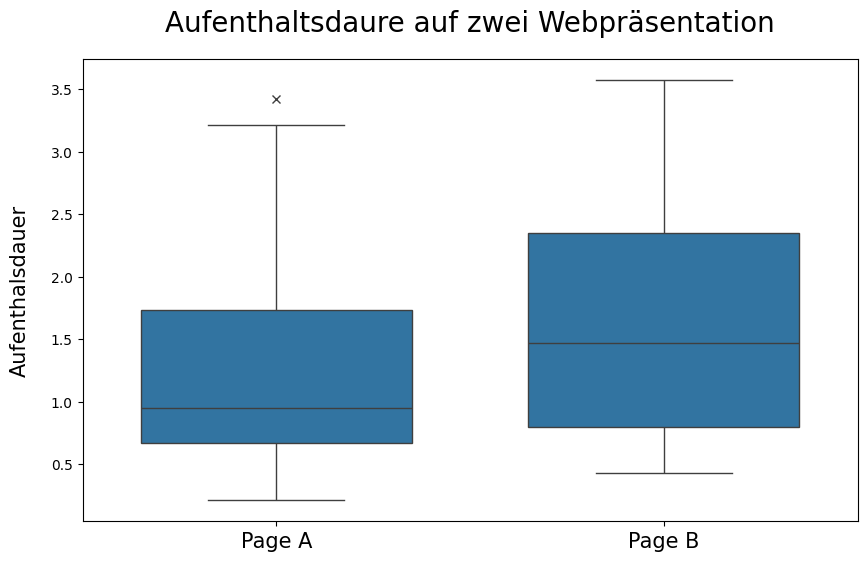

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Boxplots zeichnen
fig = plt.figure(figsize=(10,6))
axi = fig.add_subplot(1,1,1)
sns.boxplot(data=webpage_data,x="Page",y="Time",
            width=0.7,flierprops={"marker":"x"}, ax=axi)
axi.tick_params(axis="x",labelsize=15)
axi.set_title("Aufenthaltsdaure auf zwei Webpräsentation",
             fontsize=20,pad=20)
axi.set_xlabel("")
axi.set_ylabel("Aufenthalsdauer",fontsize=15,labelpad=15)

# Figur zeigen
plt.show()

Die Verweildauer auf der Seite B schein leicht grösser zu sein, aber auch die Streuung ist bei B grösser. 

Wir machen nun einen Hypothesen-Test:
- **Nullhypothese:** Die Aufenthaltsdauer ist auf beiden Seiten gleich
- **Alternativhypothese:** Die Aufenthaltsdauer auf den Seiten ist nicht gleich.

Zuerst bestimmen wir den **Unterschied der Mittelwerte in den Daten**:

In [ ]:
# Mittelwert der Aufenthaltsdauer auf der Seite A
mu_A = webpage_data["Time"][webpage_data["Page"]=="Page A"].mean()

# Mittelwert der Aufenthaltsdauer auf der Seite B
mu_B = webpage_data["Time"][webpage_data["Page"]=="Page B"].mean()

# Unterschied der Mittelwerte in den Daten
mu_diff_beobachtet = mu_B - mu_A
mu_diff_beobachtet

np.float64(0.3566666666666669)

Nun machen wir mit den Daten einen **Permutationstest**:

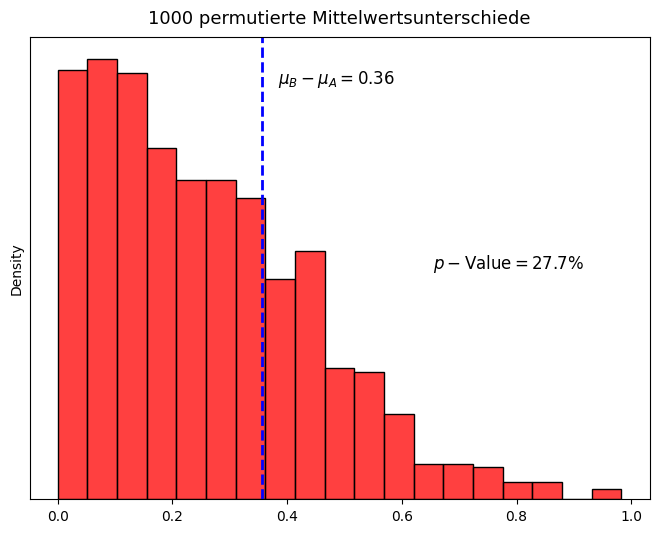

In [ ]:
# Anzahl Seiten A und B
n_A = webpage_data[webpage_data["Page"]=="Page A"].shape[0]
n_B = webpage_data[webpage_data["Page"]=="Page B"].shape[0]

# Anzahl Seiten total
n = n_A + n_B

# Sortierte Indexliste für die Zeilen im DataFrame [0,1,...,n-1]
idx = np.arange(n)

# Liste für die Mittelwertunterschiede der Resamples
mu_diff_permutiert = []

# Permutationstest
for _ in range(1000):
    # Indexliste zufällig permutieren
    idx_permutiert = np.random.permutation(idx)

    # Mittelwertunterschied im Resample berechnen
    mu_A_perm = webpage_data["Time"].loc[idx_permutiert[:n_A]].mean()
    mu_B_perm = webpage_data["Time"].loc[idx_permutiert[n_A:]].mean()
    
    # Betrag des Unterschieds speichern, weil zweiseitig getestet wird
    mu_diff_permutiert.append(np.abs(mu_A_perm - mu_B_perm))

# p-Wert berechnen
# Wie oft ist Mittelwertunterschied_Resample >= Mittelwert_beobachtet
p_value = 100*(mu_diff_permutiert >= np.abs(mu_diff_beobachtet)).mean()

# Graphische Darstellung des Tests
fig = plt.figure(figsize=(8,6))
axi = fig.add_subplot(1,1,1)

# Dichtediagramm für die Mittelwertunterschiede des Resamples
sns.histplot(mu_diff_permutiert,stat="density",color="red",ax = axi)

# Vertikale Linie beim beobachteten Mittelwertunterschied
axi.axvline(mu_diff_beobachtet,color="blue",lw=2,linestyle="dashed")
axi.text(0.4,0.9,r"$\mu_B-\mu_A=$"+"{m:1.2f}".format(m=mu_diff_beobachtet),
         fontsize=12,transform=plt.gca().transAxes)

# Ausgabe der p-Werts in die Graphik
axi.text(0.65,0.5,r"$p-$"+"Value"+r"$ = $"+"{p:1.1f}%".format(p=p_value),
                   fontsize=12,transform=plt.gca().transAxes)

axi.set_title("1000 permutierte Mittelwertsunterschiede",
                    fontsize=13,pad=10)
axi.set_xlabel("")
axi.set_yticks([])

# Figur zeigen
plt.show()

Wir erkennen, dass der Unterschied der mittleren Aufenthaltsdauer auf den beiden Seiten in den permutierten Daten häufig (ca. in 25% der Resamples) sogar noch extremer ist, als was wir in der Stichprobe beobachten. 
- **Mit dieser Stichprobe** können wir also nicht aufzeigen, dass sich die Aufenthaltsdauer auf den zwei Seiten A und B unterscheidet. Der beobachtete Unterschied ist eher zufällig.
- **Die Nullhypothese wird nicht verworffen.**

***

### <span style="color:rgb(160,0,86)">Aufgabe 2 (Konversionen im E-Commerce)</span>

**Konversionen** im E-Commerce sind die **Aktionen**, die Nutzer auf einer E-Commerce-Seite durchführen. Die **Konversionsrate** ist ein wichtiger Leistungsindikator für die Effektivität von Marketingkampagnen und Webdesign. Betrachten wir ein Unternehmen, das **zwei Preise** vergleicht:

$$\begin{array}{c|cc}
&\text{Preis A}&\text{Preis B}\\ \hline 
\text{Konversion}&200&182\\
\text{keine Konversion}&23539&22406\end{array}$$

**Preis A bringt fast 5% mehr Konversionen als Preis B:** 

$$\begin{array}{ll}
\text{Konversionsrate bei Preis A:}&\displaystyle 100\cdot\frac{200}{23539+200}\approx 0.8425\%\\
\text{Konversionsrate bei Preis B:}&\displaystyle 100\cdot\frac{182}{22406+182}\approx 0.8057\% \rule{0cm}{1.2cm}
\end{array}$$

Der ***prozentuale Unterschied von Preis B zu Preis A*** ist

$$\frac{100}{0.8057}\cdot(0.8425-0.8057)=4.567\;, \;\,\text{ also fast 5\%.}$$

Wir haben hier mehr als 45000 Datenpunkte, und es ist ***verlockend, dies als grosse Datenmenge zu betrachten***, die keine statistischen Signifikanztests erfordern. Die Konversionsraten sind jedoch so niedrig (weniger als 1%), dass die tatsächlich aussagekräftigen Werte - die Konversionen - nur im Hunderterbereich liegen, und der erforderliche Stichprobenumfang wird tatsächlich durch diese Konversionen bestimmt. 

Mit Hilfe eines **Hypothesen-Tests** können wir testen, ob der Unterschied bei den Umsätzen zwischen den Preisen A und B im Bereich der zufälligen Abweichung liegt. Die **Nullhypothese** verkörpert, dass es **keinen Unterschied zwischen den Konversionsraten gibt**. 

- Bestimmen Sie mit dem **Permutationsverfahren** eine Menge von 1000 permutierten Unterschieden und stellen Sie die Verteilung dieser permutierten **Unterschiede in einem Dichtediagramm** dar. Geben Sie auch den **p-Wert** an!
- Zeichnen Sie in das gleiche Dichtediagramm auch den **beobachteten Unterschied** ein.   
- Machen Sie den **Testentscheid** auf einem Signifikanzniveau von $\alpha = 5\%$. 


***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Wir erstellen aus den Angaben die Daten:

In [ ]:
# Angaben zu den Korversionen mit Preis A
n_A_Konversion, n_A_noKonversion = 200, 23539
n_A = n_A_Konversion + n_A_noKonversion

# Angaben zu den Korversionen mit Preis B
n_B_Konversion, n_B_noKonversion = 182, 22406
n_B = n_B_Konversion + n_B_noKonversion

Wir machen nun einen Hypothesen-Test:
- **Nullhypothese:** Die Konversionsraten der zwei Preise sind gleich
- **Alternativhypothese:** Die Konversionsraten der zwei Preise unterscheiden sich.

Zuerst bestimmen wir den **Unterschied der Konversionsraten** in den Daten:

In [ ]:
# Beobachteter Unterschied der Konversionsraten
rate_diff_beobachtet = 100 * (n_A_Konversion / n_A - n_B_Konversion / n_B)

rate_diff_beobachtet

0.03675791182059275

Nun machen wir mit den Daten einen **Permutationstest**:

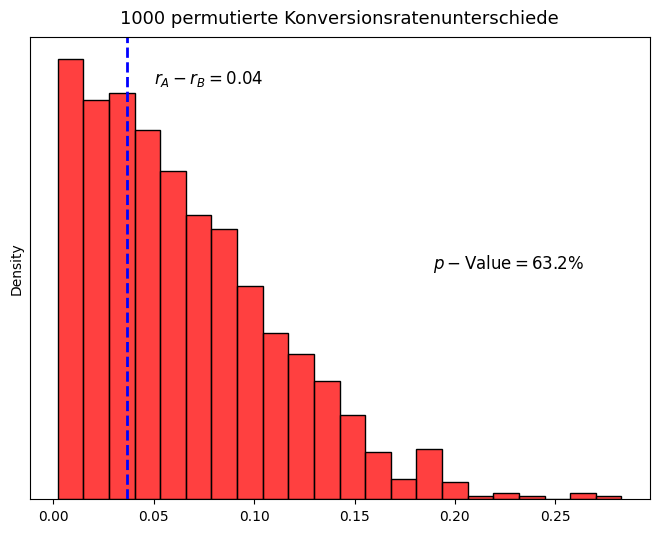

In [ ]:
# Liste mit gleich vielen Konversionen (1) und noKonversionen (0) gemäss Daten
sample = np.array( [0]*(n_A_noKonversion + n_B_noKonversion) + 
                   [1]*(n_A_Konversion + n_B_Konversion) )

# Liste für die Unterschiede in den Resamples
rate_diff_permutiert = []

# Permutationstest
for _ in range(1000):
    # zufällige Permutatioin der Daten
    sample_perm = np.random.permutation(sample)

    # Konversionsraten für die Preise A und B im resample
    rate_A_perm = sample_perm[:n_A].mean() * 100
    rate_B_perm = sample_perm[n_A:].mean() * 100

    # Betrag des Unterschieds speichern, weil zweiseitig getestet wird
    rate_diff_permutiert.append(np.abs(rate_A_perm - rate_B_perm))

# p-Wert berechnen
# Wie oft ist Mittelwertunterschied_Resample >= Mittelwert_beobachtet
p_value = 100 * (np.array(rate_diff_permutiert) >= rate_diff_beobachtet).mean()

# Graphische Darstellung des Tests
fig = plt.figure(figsize=(8,6))
axi = fig.add_subplot(1,1,1)

# Dichtediagramm für die Mittelwertunterschiede des Resamples 
sns.histplot(rate_diff_permutiert,stat="density",color="red",ax=axi)

# Vertikale Linie beim beobachteten Mittelwertunterschied
axi.axvline(rate_diff_beobachtet,color="blue",lw=2,linestyle="dashed")

# Ausgabe der p-Werts in die Graphik
axi.text(0.2,0.9,r"$r_A-r_B=$"+"{m:1.2f}".format(m=rate_diff_beobachtet),
         fontsize=12,transform=plt.gca().transAxes)
axi.text(0.65,0.5,r"$p-$"+"Value"+r"$ = $"+"{p:1.1f}%".format(p=p_value),
         fontsize=12,transform=plt.gca().transAxes)

axi.set_title("1000 permutierte Konversionsratenunterschiede",fontsize=13,pad=10)
axi.set_xlabel("")
axi.set_yticks([])

# Figur zeigen
plt.show()

Wir erkennen, dass der Unterschied der mittleren Konversionsraten für die beiden Preise in den permutierten Daten häufig (ca. in 60% der Resamples) sogar noch extremer ist, als was wir in der Stichprobe beobachten. 
- **Mit dieser Stichprobe** können wir also nicht aufzeigen, dass sich die Konversionsrate für die zwei Preise A und B unterscheidet. Der beobachtete Unterschied ist eher zufällig.
- **Die Nullhypothese wird nicht verworffen.**

***

### <span style="color:rgb(160,0,86)">Aufgabe 3 (Bestellzeit pro Kunde)</span>

Ein Online-Shop möchte überprüfen, ob die **durchschnittliche Bestellzeit pro Kunde** nach einem Systemupdate verändert wurde.

Vor dem Update lag die durchschnittliche Bestellzeit bei **5.2 Minuten**.
Nach dem Update wurden **100 neue Bestellzeiten gemessen**.

- **Laden Sie die Daten** der Stichprobe in der Datei *bestellzeiten.csv* im Ordner Daten. 
- Zeichnen Sie für die Bestelldauer einen **Regenwolkenplot**.

Mit einem **Bootstrap-Test** soll geprüft werden, ob sich die durchschnittliche Bestellzeit signifikant vom bisherigen Wert unterscheidet:
- Formulieren Sie die **Null- und Alternativhypothese**, führen Sie den **Bootstrap-Test** mit einer geeigneten Anzahl von Wiederholungen durch und interpretieren Sie den **p-Wert** auf einem **Signifikanznieveau von 5%**.

***

### <span style="color:rgb(160,0,86)">Lösungsvorschlag</span>

Wir laden die Daten:

In [ ]:
import numpy as np
import pandas as pd

bestellzeiten = pd.read_csv("Daten/bestellzeiten.csv")
bestellzeiten.head()

,Zeit
0,5.794
1,4.904
2,7.006
3,5.334
4,4.329


Für die **Bestelldauer** zeichnen wir **einen Regenwolkenplot**:

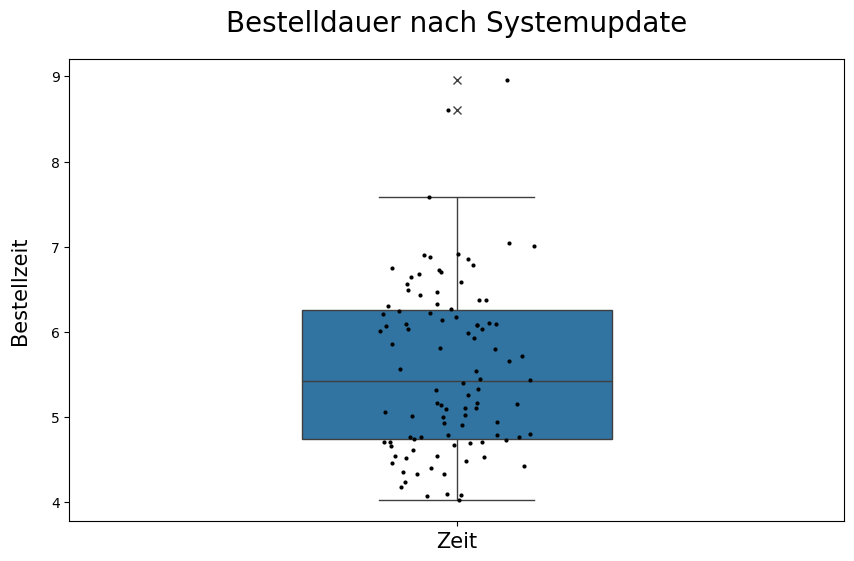

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Regenwolkenplot zeichnen
fig = plt.figure(figsize=(10,6))
axi = fig.add_subplot(1,1,1)
sns.boxplot(data=bestellzeiten,
            width=0.4,flierprops={"marker":"x"}, ax=axi)
sns.stripplot(data=bestellzeiten,color="black", size=3, ax=axi)
axi.tick_params(axis="x",labelsize=15)
axi.set_title("Bestelldauer nach Systemupdate",
             fontsize=20,pad=20)
axi.set_xlabel("")
axi.set_ylabel("Bestellzeit",fontsize=15,labelpad=15)

# Figur zeigen
plt.show()

Die mittlere Bestelldauer nach dem Systemupdate schein leicht grösser zu sein, als der Sollwert von 5.2 Minuten. 

Wir machen nun einen Hypothesen-Test:
- **Nullhypothese:** Die mittlere Bestelldauer ist gleich dem Sollwert von $\,\pmb{\mu_0 = 5.2}\,$ Minuten.
- **Alternativhypothese:** Die Bestelldauer ist nicht gleich dem Sollwert von $\,\pmb{\mu_0 = 5.2}\,$ Minuten.

Nun machen wir mit den Daten einen **Bootstrap-Test**:

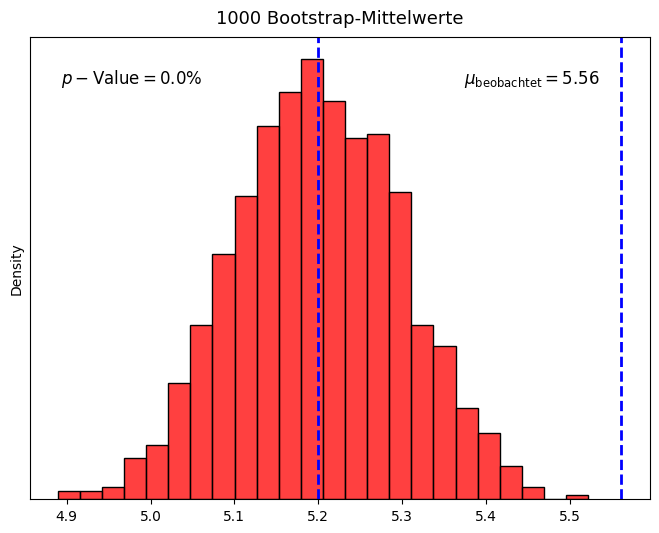

In [ ]:
# Sollwert mu = 5.2
mu_0 = 5.2

# Beobachteter Mittelwert in den Daten
mu_beobachtet = bestellzeiten["Zeit"].mean()

# Liste für die Mittelwertunterschiede der Resamples
mu_bootstrap = []

# Bootstraptest
for _ in range(1000):
    # resample mit Zurücklegen
    sample = np.random.choice(bestellzeiten["Zeit"],
                              size=bestellzeiten.shape[0],
                              replace = True)

    # Mittelwert im Resample berechnen
    mu_resample = sample.mean()
    
    # Mittwelwert speichern
    mu_bootstrap.append(mu_resample)

# Verteilung der resamples bezüglich der Nullhypotheses verschieben
mu_resample_shift = mu_bootstrap - np.array(mu_bootstrap).mean() + mu_0 

# p-Wert berechnen: Zweiseitig bedeutet, wie oft ist
# |Mittelwert_resample - Sollwert| >= |Mittelwert_beobachtet - Sollwert| 
p_value = (np.abs(mu_resample_shift - mu_0) >= 
           np.abs(mu_beobachtet - mu_0)).mean()

# Graphische Darstellung des Tests
fig = plt.figure(figsize=(8,6))
axi = fig.add_subplot(1,1,1)

# Dichtediagramm für die Mittelwertunterschiede des Resamples
sns.histplot(mu_resample_shift,stat="density",color="red",ax = axi)

# Vertikale Linie bei mu_beobachtet in den Daten und mu_0
axi.axvline(mu_beobachtet,color="blue",lw=2,linestyle="dashed")
axi.axvline(mu_0,color="blue",lw=2,linestyle="dashed")
axi.text(0.7,0.9,r"$\mu_{\mathsf{beobachtet}}=$"+"{m:1.2f}".format(m=mu_beobachtet),
         fontsize=12,transform=plt.gca().transAxes)

# Ausgabe der p-Werts in die Graphik
axi.text(0.05,0.9,r"$p-$"+"Value"+r"$ = $"+"{p:1.1f}%".format(p=p_value),
                   fontsize=12,transform=plt.gca().transAxes)

axi.set_title("1000 Bootstrap-Mittelwerte",
                    fontsize=13,pad=10)
axi.set_xlabel("")
axi.set_yticks([])

# Figur zeigen
plt.show()

Wir erkennen, dass der Unterschied vom Sollwert $\,\pmb{\mu_0 = 5.2}\,$ zum beobachteten Mittelwert in den Resamples selten bis nie (ca. 0%) übertroffen wird. 
- **Mit dieser Stichprobe** können wir also aufzeigen, dass sich die Bestelldauer vom Sollwert unterscheidet. Der beobachtete Unterschied kann nicht mit Zufall erklärt werden.
- **Die Nullhypothese wird verworffen.**

***

![HSLU](Bilder/LogoHSLU.png)